In [2]:
#@title Default title text { run: "auto", vertical-output: true }
variable_name = ""
from google.colab import drive
drive.mount('/content/drive')

ImportError: No module named colab

In [0]:
!google-drive-ocamlfuse -cc

/bin/bash: google-drive-ocamlfuse: command not found


In [0]:
with open('/content/drive/My Drive/filename.txt', 'w') as f:
   f.write('values')

In [0]:
!wget -P "/content/drive/My Drive/data" "data.vision.ee.ethz.ch/cvl/DIV2K/DIV2K_train_HR.zip"

--2019-01-31 19:16:12--  http://data.vision.ee.ethz.ch/cvl/DIV2K/DIV2K_train_HR.zip
Resolving data.vision.ee.ethz.ch (data.vision.ee.ethz.ch)... 129.132.52.162
Connecting to data.vision.ee.ethz.ch (data.vision.ee.ethz.ch)|129.132.52.162|:80... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://data.vision.ee.ethz.ch/cvl/DIV2K/DIV2K_train_HR.zip [following]
--2019-01-31 19:16:13--  https://data.vision.ee.ethz.ch/cvl/DIV2K/DIV2K_train_HR.zip
Connecting to data.vision.ee.ethz.ch (data.vision.ee.ethz.ch)|129.132.52.162|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3530603713 (3.3G) [application/zip]
Saving to: ‘/content/drive/My Drive/data/DIV2K_train_HR.zip’

DIV2K_train_HR.zip  100%[===================>]   3.29G  17.0MB/s    in 3m 22s  

2019-01-31 19:19:35 (16.7 MB/s) - ‘/content/drive/My Drive/data/DIV2K_train_HR.zip’ saved [3530603713/3530603713]



In [0]:
!mkdir "/content/data_set"

In [0]:
!unzip "/content/drive/My Drive/data/DIV2K_train_HR.zip" -d "/content/drive/My Drive/data/"

Archive:  /content/drive/My Drive/data/DIV2K_train_HR.zip
   creating: /content/drive/My Drive/data/DIV2K_train_HR/
  inflating: /content/drive/My Drive/data/DIV2K_train_HR/0103.png  
  inflating: /content/drive/My Drive/data/DIV2K_train_HR/0413.png  
  inflating: /content/drive/My Drive/data/DIV2K_train_HR/0031.png  
  inflating: /content/drive/My Drive/data/DIV2K_train_HR/0660.png  
  inflating: /content/drive/My Drive/data/DIV2K_train_HR/0126.png  
  inflating: /content/drive/My Drive/data/DIV2K_train_HR/0793.png  
  inflating: /content/drive/My Drive/data/DIV2K_train_HR/0764.png  
  inflating: /content/drive/My Drive/data/DIV2K_train_HR/0550.png  
  inflating: /content/drive/My Drive/data/DIV2K_train_HR/0437.png  
  inflating: /content/drive/My Drive/data/DIV2K_train_HR/0374.png  
  inflating: /content/drive/My Drive/data/DIV2K_train_HR/0755.png  
  inflating: /content/drive/My Drive/data/DIV2K_train_HR/0614.png  
  inflating: /content/drive/My Drive/data/DIV2K_train_HR/0646.png  


In [0]:
!ls drive/My\ Drive/data/

In [0]:
import sys
sys.path.append('/content/drive/My Drive/Colab Notebooks/code/')
sys.path.append('/content/drive/My Drive/Colab Notebooks/code/cnn_super_resolution')
sys.path.append('/content/drive/My Drive/Colab Notebooks/')

In [ ]:
img_path = "/home/sreramk/PycharmProjects/neuralwithtensorgpu/dataset/DIV2K_train_HR/"

In [0]:
from cnn_super_resolution import super_resolution_arch

In [0]:

import cv2
import os

import tensorflow as tf

import matplotlib.pyplot as plt
import matplotlib

#matplotlib.use('agg')

%matplotlib inline

from prepare_dataset.img_ds_manage import ImageDSManage


In [0]:
img_manager = ImageDSManage([img_path],
                                image_buffer_limit=100, buffer_priority=100)

In [0]:
network_manager = super_resolution_arch.SRNetworkManager("model_1", img_path)


In [0]:
network_manager.set_strides_arch(super_resolution_arch.SRNetworkManager.generate_strides_one(3))

In [0]:
filter_arch = [
        [10, 10, 3, 80],
        [2, 2, 80, 40],
        [10, 10, 40, 3]
    ]

network_manager.set_filter_arch(filter_arch)

bias_arch = [
    [80], [40], [3]
]

network_manager.set_bias_arch(bias_arch)

network_manager.get_device_name()

network_manager.init_device_name('/gpu:0')

network_manager.construct_filters(create_network_flag=network_manager.check_if_file_exists())

network_manager.construct_layers()

network_loss = network_manager.get_input_transform_restrain_loss()

adam_optimizer = network_manager.get_adam_loss_optimizer(network_loss)

network_manager.get_or_init_network_output([None, -2])

[<tf.Tensor 'truediv_3:0' shape=(?, ?, ?, 3) dtype=float32>,
 <tf.Tensor 'truediv_4:0' shape=(?, ?, ?, 40) dtype=float32>]

In [0]:
min_x, min_y, batch_down_sampled, batch_original = img_manager.get_batch(batch_size=6,
                                                                                     down_sample_factor=4,
                                                                                     min_x_f=70,
                                                                                     min_y_f=70)

In [0]:
with tf.Session(config=tf.ConfigProto(log_device_placement=True)) as sess:
    init = tf.initialize_all_variables()

    sess.run(init)
    
    for j in range(100):

        print("Count: " + str(j))

        min_x, min_y, batch_down_sampled, batch_original = img_manager.get_batch(batch_size=6,
                                                                                 down_sample_factor=4,
                                                                                 min_x_f=70,
                                                                                 min_y_f=70)

        # for i in range(len(batch_original)):
        #    batch_original[i] = cv2.resize(batch_original[i], dsize=(52, 52))

        # batch_down_sampled = np.asarray(batch_down_sampled)

        # batch_down_sampled.fill(1.0)

        for i in range(100):
            # for j in range(10):

            min_x, min_y, batch_down_sampled, batch_original = img_manager.get_batch(batch_size=6,
                                                                                     down_sample_factor=4,
                                                                                     min_x_f=70,
                                                                                     min_y_f=70)

            minimize, loss = sess.run(fetches=[adam_optimizer, network_loss],
                                      feed_dict={network_manager.get_input(): batch_down_sampled,
                                                 network_manager.get_expected_out(): batch_original,
                                                 })
            if i % 100 == 0:
                print("epoch :" + str(i))
                print("loss: " + str(loss))

        for i in range(1):
            # min_x, min_y, batch_down_sampled, batch_original = img_manager.get_batch(batch_size=1, down_sample_factor=10,
            #                                                                     min_x_f=400, min_y_f=400 )

            computed_image = sess.run(fetches=[network_manager.get_or_init_network_output()],
                                      feed_dict={network_manager.get_input(): batch_down_sampled})

            print(len(computed_image))
            print(len(computed_image[0]))
            print(len(computed_image[0][0]))
            print(len(computed_image[0][0][0]))
            print(len(computed_image[0][0][0][0]))

            #cv2.imshow("original" + str(i) + "_" + str(j), batch_original[i])
            #cv2.imshow("down_sampled" + str(i) + "_" + str(j), batch_down_sampled[i])
            #cv2.imshow("computed" + str(i) + "_" + str(j), computed_image[0][i])
            plt.imshow(batch_original[i])
            plt.imshow(batch_down_sampled[i])
            plt.imshow(computed_image[0][i])
        #cv2.waitKey(0)

        computed_image = None

        for i in range(2):
            min_x, min_y, batch_down_sampled, batch_original = img_manager.get_batch(batch_size=1,
                                                                                     down_sample_factor=4,
                                                                                     min_x_f=400, min_y_f=400)

            # batch_down_sampled = 1 - np.asarray(batch_down_sampled)

            # if computed_image != None:
            #    batch_down_sampled[0] = computed_image[0][0]

            computed_image = sess.run(fetches=[network_manager.get_or_init_network_output()],
                                      feed_dict={network_manager.get_input(): batch_down_sampled})

            """
            print (len(computed_image))
            print (len(computed_image[0]))
            print (len(computed_image[0][0]))
            print (len(computed_image[0][0][0]))
            print (len(computed_image[0][0][0][0]))
            """

            #cv2.imshow("2original" + str(i) + "_" + str(j), batch_original[0])
            #cv2.imshow("2down_sampled" + str(i) + "_" + str(j), batch_down_sampled[0])
            #cv2.imshow("2computed" + str(i) + "_" + str(j), computed_image[0][0])
            plt.figure()
            plt.imshow( batch_original[0])
            plt.imshow( batch_down_sampled[0])
            plt.imshow( computed_image[0][0])
            
        for i in range(2):
            min_x, min_y, batch_down_sampled, batch_original = img_manager.get_batch(batch_size=1,
                                                                                     down_sample_factor=4,
                                                                                     min_x_f=400, min_y_f=400)

            # batch_down_sampled = 1 - np.asarray(batch_down_sampled)

            # if computed_image != None:
            #    batch_down_sampled[0] = computed_image[0][0]

            computed_image, computed_org = sess.run(fetches=[
                                               network_manager.get_or_init_network_output(output_index=-2),
                                               network_manager.get_or_init_network_output()],
                                      feed_dict={network_manager.get_input(): batch_down_sampled})

            """
            print (len(computed_image))
            print (len(computed_image[0]))
            print (len(computed_image[0][0]))
            print (len(computed_image[0][0][0]))
            print (len(computed_image[0][0][0][0]))
            """

            #cv2.imshow("L2_2original" + str(i) + "_" + str(j), batch_original[0])
            #cv2.imshow("L2_2down_sampled" + str(i) + "_" + str(j), batch_down_sampled[0])
            #cv2.imshow("L2_2computed" + str(i) + "_" + str(j), computed_org[0])

            plt.imshow(batch_original[0])
            plt.imshow(batch_down_sampled[0])
            plt.imshow(computed_org[0])

            for x in range(0, int(40)):
                computed_image_temp = computed_image[0][:, :, x]
                #cv2.imshow("L2_2computed" + str(i) + "_" + str(j) +"_" + str(x), computed_image_temp)
                plt.imshow(computed_image_temp)
            plt.colorbar()
            plt.grid(False)
    #cv2.waitKey(0)
    #cv2.destroyAllWindows()

    

Count: 0
epoch :0
loss: -17.746883
1
6
70
70
3
Count: 1
epoch :0
loss: -37.638737
1
6
70
70
3
Count: 2
epoch :0
loss: -41.10203
1
6
70
70
3
Count: 3
epoch :0
loss: -40.493076
1
6
70
70
3
Count: 4
epoch :0
loss: -41.850876
1
6
70
70
3
Count: 5
epoch :0
loss: -45.703014
1
6
70
70
3
Count: 6
epoch :0
loss: -47.47202
1
6
70
70
3
Count: 7
epoch :0
loss: -49.32886
1
6
70
70
3
Count: 8
epoch :0
loss: -43.33191
1
6
70
70
3
Count: 9
epoch :0
loss: -42.544483
1
6
70
70
3


/usr/local/lib/python3.6/dist-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


Count: 10
epoch :0
loss: -48.99166
1
6
70
70
3
Count: 11
epoch :0
loss: -41.600994
1
6
70
70
3
Count: 12
epoch :0
loss: -44.52759
1
6
70
70
3
Count: 13
epoch :0
loss: -50.197372
1
6
70
70
3
Count: 14
epoch :0
loss: -35.30831
1
6
70
70
3
Count: 15
epoch :0
loss: -46.745632
1
6
70
70
3
Count: 16
epoch :0
loss: -41.597317
1
6
70
70
3


KeyboardInterrupt: ignored

In [0]:
import matplotlib.pyplot as plt
import os
import cv2
items = os.listdir('/content/DIV2K_train_HR')
print (items)    

['0757.png', '0619.png', '0258.png', '0677.png', '0119.png', '0301.png', '0362.png', '0416.png', '0336.png', '0696.png', '0406.png', '0057.png', '0478.png', '0266.png', '0727.png', '0180.png', '0781.png', '0373.png', '0721.png', '0627.png', '0088.png', '0653.png', '0636.png', '0159.png', '0049.png', '0116.png', '0502.png', '0174.png', '0244.png', '0617.png', '0630.png', '0383.png', '0031.png', '0318.png', '0040.png', '0278.png', '0755.png', '0020.png', '0571.png', '0470.png', '0691.png', '0289.png', '0296.png', '0697.png', '0587.png', '0041.png', '0476.png', '0033.png', '0047.png', '0552.png', '0799.png', '0456.png', '0572.png', '0140.png', '0338.png', '0434.png', '0177.png', '0367.png', '0107.png', '0311.png', '0742.png', '0705.png', '0602.png', '0554.png', '0447.png', '0068.png', '0329.png', '0748.png', '0342.png', '0201.png', '0354.png', '0038.png', '0713.png', '0692.png', '0440.png', '0220.png', '0551.png', '0124.png', '0310.png', '0164.png', '0045.png', '0304.png', '0131.png', '02

0757.png
/content/DIV2K_train_HR/0757.png
0619.png
/content/DIV2K_train_HR/0619.png
0258.png
/content/DIV2K_train_HR/0258.png
0677.png
/content/DIV2K_train_HR/0677.png
0119.png
/content/DIV2K_train_HR/0119.png
0301.png
/content/DIV2K_train_HR/0301.png
0362.png
/content/DIV2K_train_HR/0362.png
0416.png
/content/DIV2K_train_HR/0416.png
0336.png
/content/DIV2K_train_HR/0336.png
0696.png
/content/DIV2K_train_HR/0696.png


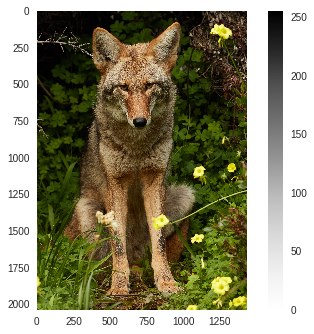

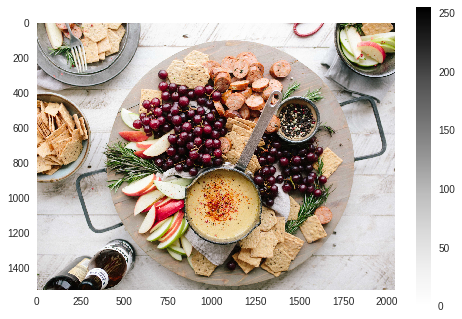

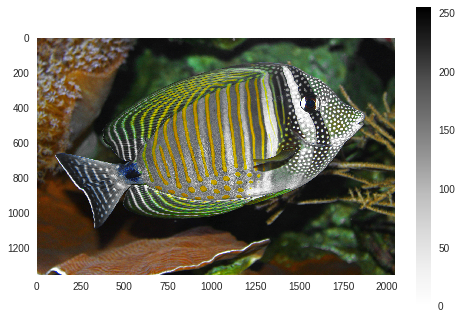

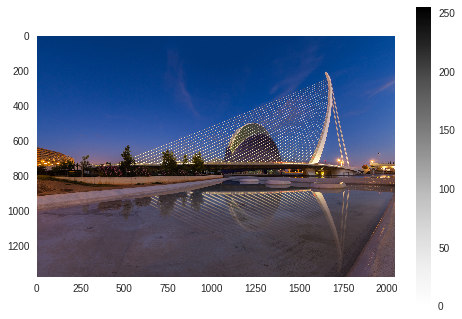

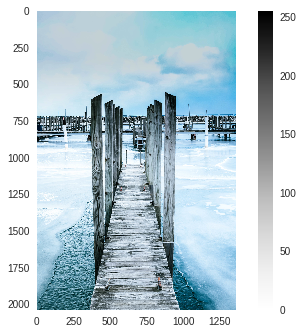

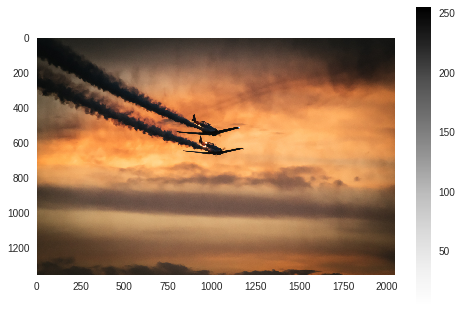

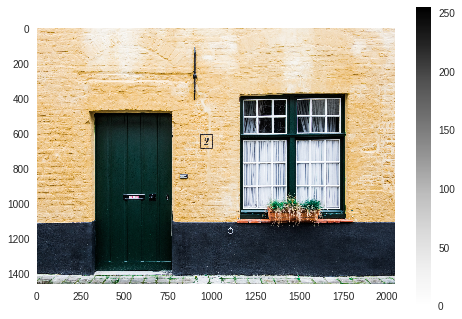

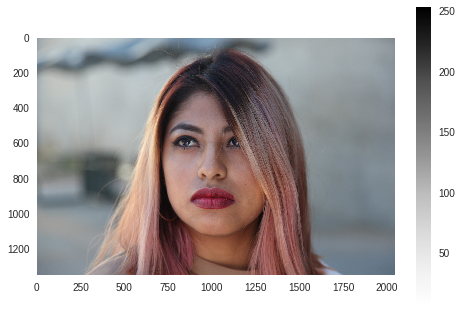

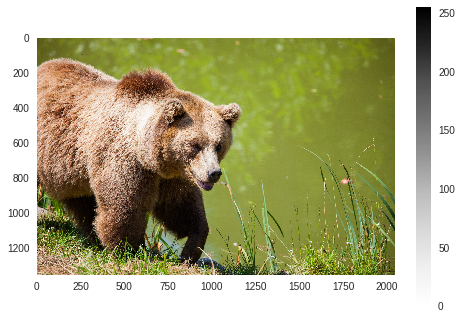

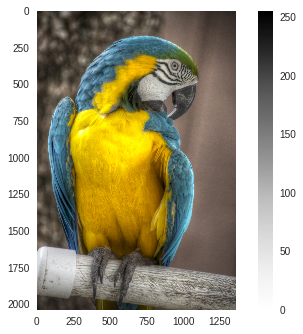

In [0]:
i = 0
for each_image in items:
    if i >= 10: 
      break
    print (each_image)
    full_path = "/content/DIV2K_train_HR/" + each_image
    print (full_path)
    image = cv2.imread(full_path)
    image = cv2.cvtColor(image,cv2.COLOR_BGR2RGB)
    plt.figure()
    plt.imshow(image)
    plt.colorbar()
    plt.grid(False)
    i += 1